# Imports

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from config import paths
import os

# Connecting and getting data

In [80]:
folder_paths = paths.get_paths()
folder_path = folder_paths["data"]
file_path = os.path.join(folder_path, 'combine_ML.csv')
df = pd.read_csv(file_path)

In [81]:
print(df)

      Parameter_name  Parameter_value Regression_model  Correlating_parameter  \
0    marching_cubess             0.90          XGBoost                    NaN   
1             alphas             0.30          XGBoost                    NaN   
2    marching_cubess             0.30    Random_forest                    NaN   
3    marching_cubess             0.70    Random_forest                    NaN   
4           poissons            12.00    Random_forest                    NaN   
..               ...              ...              ...                    ...   
215           alphas             4.00          XGBoost                    NaN   
216   ball_pivotings             0.25          XGBoost                    NaN   
217           alphas             0.20    Random_forest                    NaN   
218           alphas             0.01          XGBoost                    NaN   
219           alphas             0.01    Random_forest                    NaN   

     RMSE_score_calibration

# Plots

## R2 for each parameter

-0.181336323 1


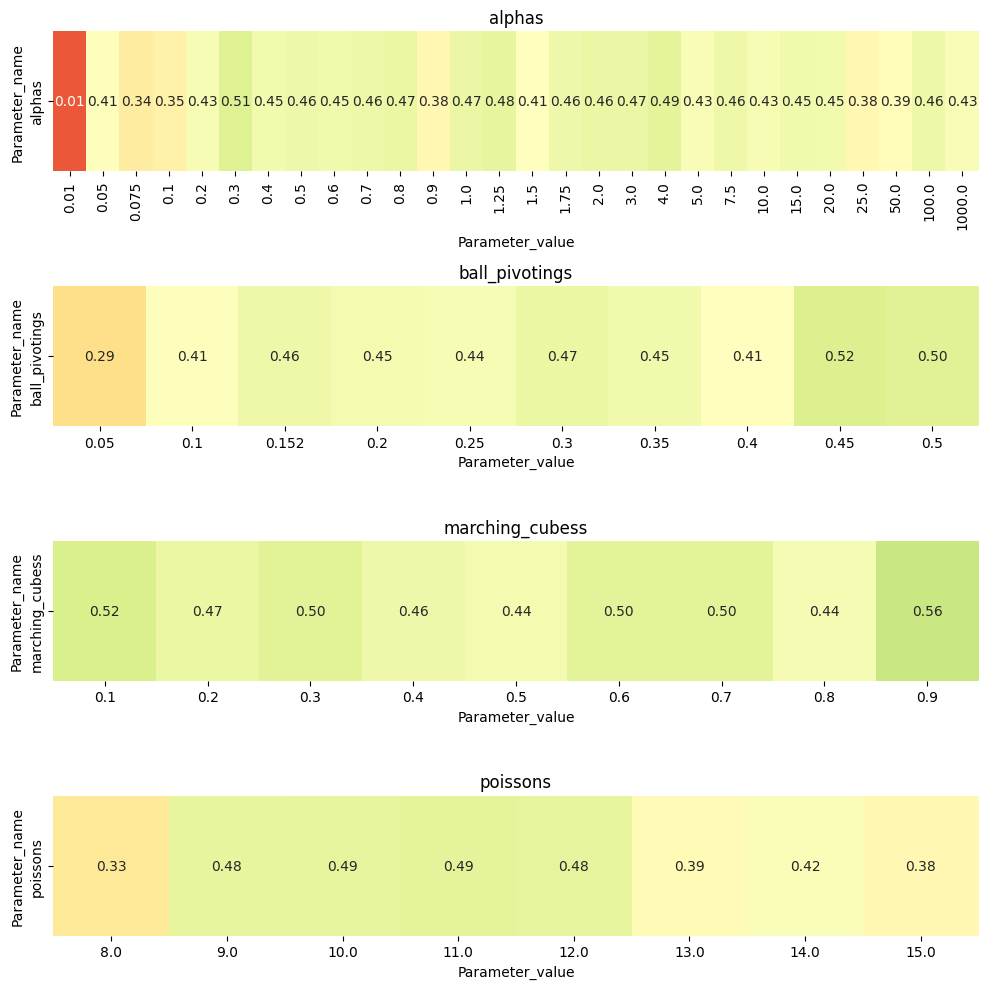

In [82]:
df_current = df[df['Regression_model'] == 'XGBoost']

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Get the minimum and maximum values from all data
vmin = df_current['R2_score_validation'].min()
vmax = 1
print(vmin, vmax)

# Plotting heatmaps
for i, (param, group) in enumerate(df_current.groupby('Parameter_name')):
    pivot_table = group.pivot_table(index='Parameter_name', columns='Parameter_value', values='R2_score_validation')
    sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt='.2f', cbar=False, ax=axes[i], vmin=vmin, vmax=vmax)
    axes[i].set_title(param)

plt.tight_layout()
plt.show()